In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
X , y = datasets.make_regression(n_samples = 100 , n_features=1 , noise=20 , random_state=4)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , random_state = 1234)

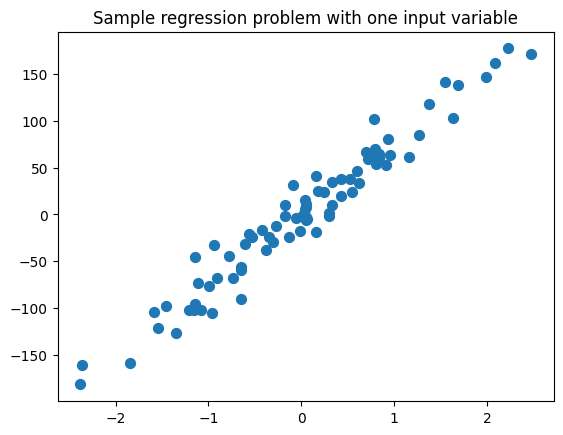

In [ ]:
plt.figure()
plt.title("Sample regression problem with one input variable")
plt.scatter(X_train , y_train , marker= 'o', s=50)
plt.show()

In [ ]:
def computeCostFunction_vectorized(x, y,w,b):
    m = x.shape[0]
    f = np.zeros((m,))
    f = np.dot(x,w)+b
    cost_J = (np.sum((f - y)**2)/(2*m))
    return cost_J

def compute_derivative_vectorized(x,y,w,b):
    m ,n = x.shape
    err = (np.dot(x,w)+b)-y
    dj_dw = np.sum(err * x.T , axis = 1)/m
    dj_db = np.sum(err) / m

    return dj_db , dj_dw

def fitt(X,y,alpha,num_iters):
    n_samples , n_features = X.shape
    w = np.zeros([n_features])
    b = 0
    J_values = []
    for i in range(num_iters):
        dj_db , dj_dw = compute_derivative_vectorized(X,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J_values.append(computeCostFunction_vectorized(X , y,w,b))
    return w , b , J_values

def predict(X,w,b):
    y_hat = np.dot(X , w) + b
    return y_hat

In [ ]:
iter = 400
alpha = 0.01

w , b , J_values = fitt(X_train , y_train , alpha , iter)
print("w= ", w,"\nb= ",b)

w=  [73.77153279] 
b=  -0.04502429927019883


In [ ]:
###
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
linreg = reg.fit(X_train , y_train)


print("linear model coeff (w): " , linreg.coef_)
print("linear model intercept (b): " , linreg.intercept_)

linear model coeff (w):  [75.05935146]
linear model intercept (b):  -0.1424160855882628


In [ ]:
###
from sklearn.linear_model import SGDRegressor

sgdreg = SGDRegressor(max_iter=400 , alpha = 0.01)
linreg = sgdreg.fit(X_train , y_train)
print("linear model coeff (w): " , linreg.coef_)
print("linear model intercept (b): " , linreg.intercept_)

linear model coeff (w):  [74.30259379]
linear model intercept (b):  [-0.11359006]


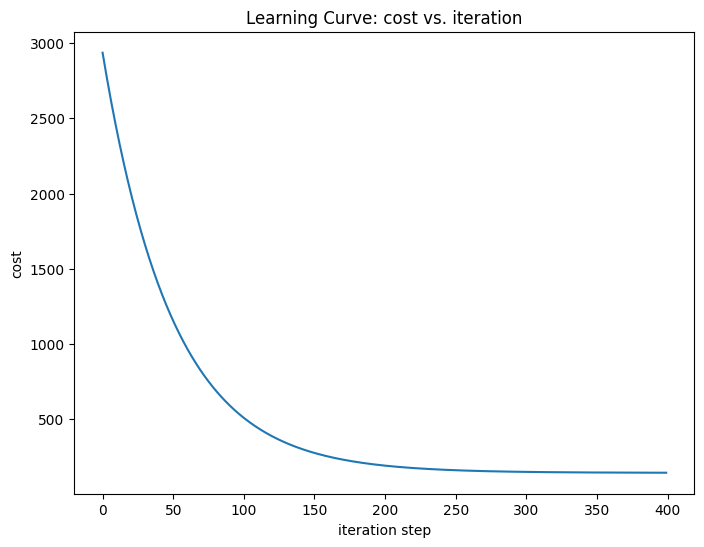

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(J_values)
plt.title("Learning Curve: cost vs. iteration")
plt.ylabel("cost")
plt.xlabel("iteration step")
plt.show()

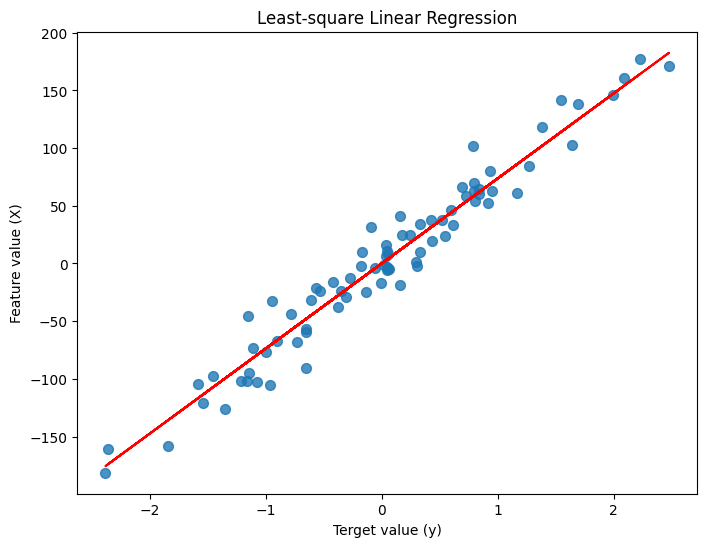

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train , y_train , marker = 'o', s=50 , alpha = 0.8)
plt.plot(X_train , w* X_train + b , '-r')
plt.title('Least-square Linear Regression')
plt.ylabel("Feature value (X)")
plt.xlabel("Terget value (y)")
plt.show()